In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_students = pd.read_csv("C:/Users/HP/Downloads/grades.csv", delimiter=',', header='infer')

In [3]:
df_students = df_students.dropna(axis=0, how='any')

In [4]:
passes = pd.Series(df_students.Grade >= 60)
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)
df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


In [5]:
var_data = df_students.Grade

Minimum: 3.00
Maximum: 97.00
Mean: 49.18
Median: 49.50
Mode: 50.00



C:\Users\HP\AppData\Local\Temp\ipykernel_9680\3322101483.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


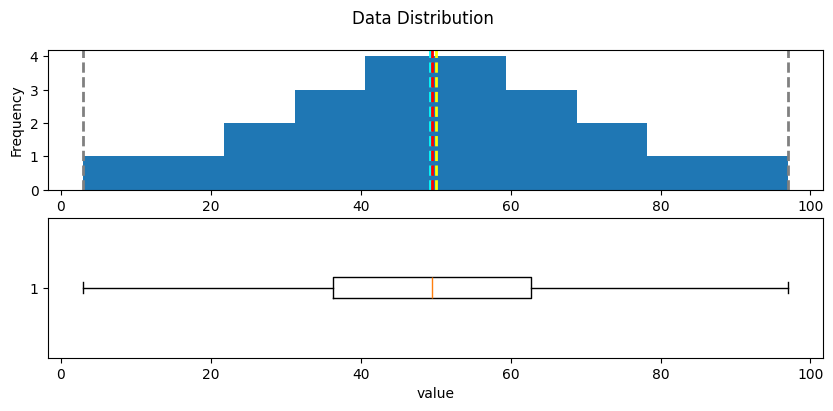

In [6]:
# create a function we can reuse
def show_distribution(var_data):
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode() [0]

    print('Minimum: {:.2f}\nMaximum: {:.2f}\nMean: {:.2f}\nMedian: {:.2f}\nMode: {:.2f}\n'.format(min_val, max_val, mean_val, med_val, mod_val))

    # create a figure for two subplots ( 2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize=(10, 4))
    # plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')
    # add lines for the mean, median and mode
    ax[0].axvline(x=min_val, color='gray', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=med_val, color='red', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mod_val, color='yellow', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=max_val, color='gray', linestyle='dashed', linewidth=2)

    # plot the box plot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('value')
    # add title to the figure
    fig.suptitle('Data Distribution')
    fig.show()
    

show_distribution(df_students.Grade)

   

Minimum: 1.00
Maximum: 16.00
Mean: 10.52
Median: 10.00
Mode: 9.00



C:\Users\HP\AppData\Local\Temp\ipykernel_9680\3322101483.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


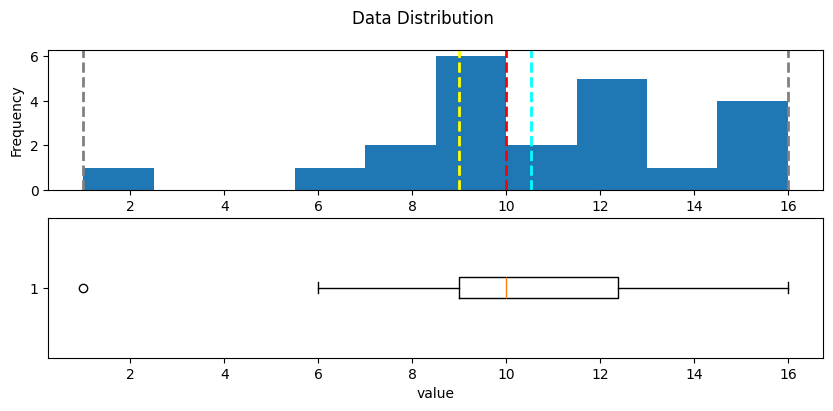

In [7]:
col = df_students.StudyHours
show_distribution(col)

Minimum: 6.00
Maximum: 16.00
Mean: 10.98
Median: 10.00
Mode: 9.00



C:\Users\HP\AppData\Local\Temp\ipykernel_9680\3322101483.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


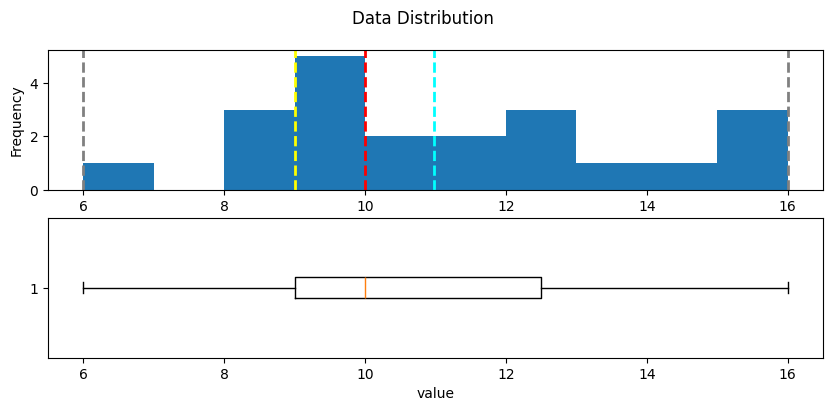

In [8]:
col=df_students[df_students.StudyHours>1].StudyHours
show_distribution(col)

Minimum: 6.00
Maximum: 16.00
Mean: 10.98
Median: 10.00
Mode: 9.00



C:\Users\HP\AppData\Local\Temp\ipykernel_9680\3322101483.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


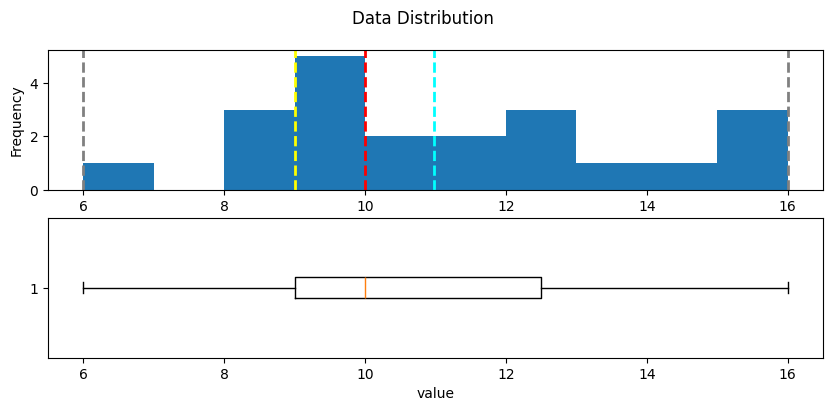

In [9]:
# calculate the 0.01th percentile
q01 = df_students.StudyHours.quantile(0.01)
col = df_students[df_students.StudyHours>q01].StudyHours
show_distribution(col)

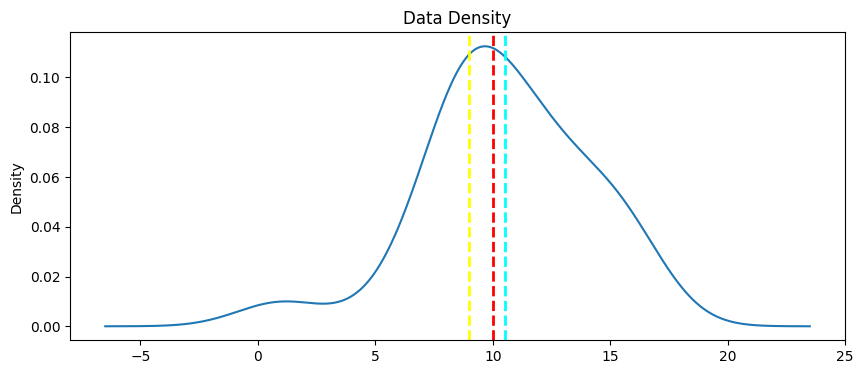

In [10]:
def show_density(var_data):
   

    fig = plt.figure(figsize=(10, 4))

    # Plot the density
    var_data.plot.density()
    
    # Add lines for mean, median, and mode
    plt.title('Data Density')
    plt.axvline(x=var_data.mean(), color='cyan', linestyle='dashed', linewidth=2)
    plt.axvline(x=var_data.median(), color='red', linestyle='dashed', linewidth=2)
    plt.axvline(x=var_data.mode()[0], color='yellow', linestyle='dashed', linewidth=2)

    plt.show()
col = df_students.StudyHours
show_density(col)

In [11]:
for col_name in ['Grade', 'StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


<function matplotlib.pyplot.show(close=None, block=None)>

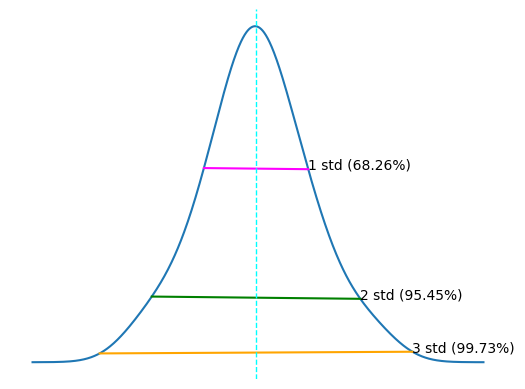

In [12]:
import scipy.stats as stats
#get the grade column
col = df_students['Grade']
# get the density
density = stats.gaussian_kde(col)
col.plot.density()
# get the mean and standard deviation
s = col.std()
m = col.mean()
# annotate 1 stdev
x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1, y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1], y1[1]))

# annotate 2 stdev
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2, y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1], y2[1]))

# annotate 3 stdev
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3, y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1], y3[1]))

# show the location of the mean
plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)
plt.axis('off')
plt.show


In [13]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


In [14]:
df_sample = df_students[df_students.StudyHours > 1]
df_sample

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True
10,Francesca,15.50,82.0,True


<Axes: title={'center': 'StudyHours'}, xlabel='Pass'>

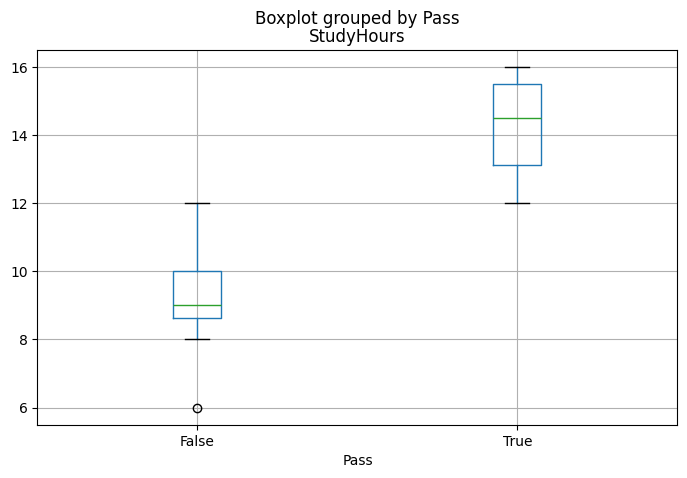

In [15]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8, 5))

<Axes: xlabel='Name'>

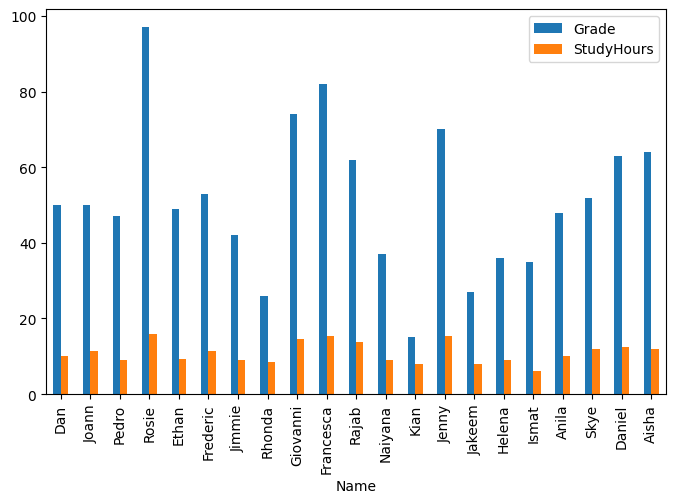

In [16]:
df_sample.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(8, 5))

<Axes: xlabel='Name'>

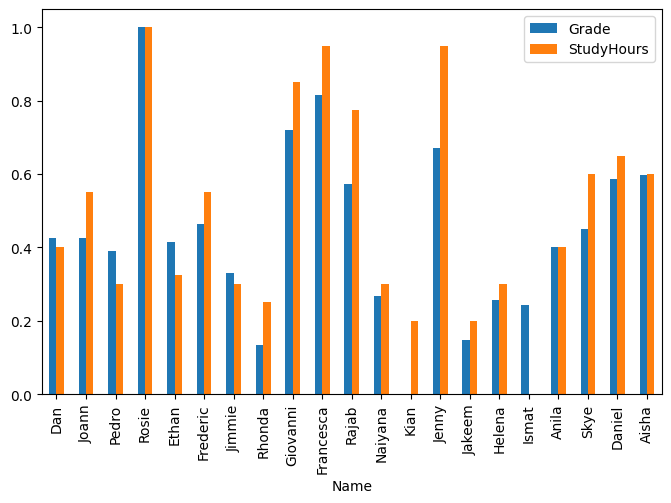

In [32]:
from sklearn.preprocessing import MinMaxScaler
# get a scalar object
scaler = MinMaxScaler()
# create a new dataframe for the scaled values
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()
# normalize the numeric columns
df_normalized[['Grade', 'StudyHours']] = scaler.fit_transform(df_normalized[['Grade', 'StudyHours']])
df_normalized.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(8, 5))


In [28]:
df_normalized.Grade.corr(df_normalized.StudyHours)

np.float64(0.9117666413789677)

<Axes: title={'center': 'Study Time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

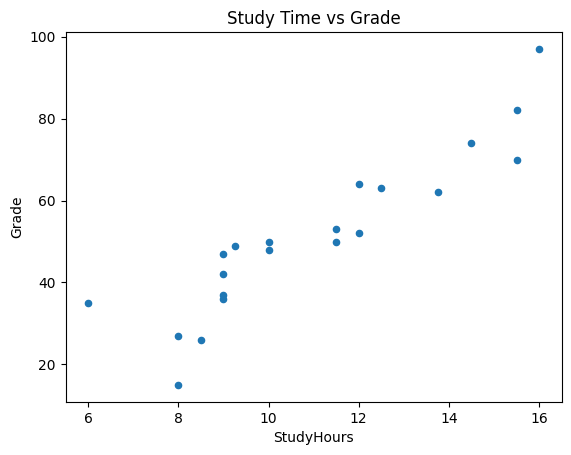

In [19]:
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

slope: 6.3134
y-intercept: -17.9164
so...
 f(x) = 6.3134x + -17.9164


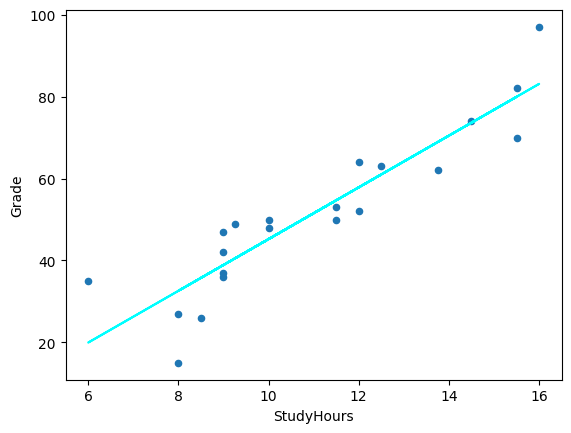

In [38]:
from scipy import stats
df_regression = df_sample[['Grade', 'StudyHours']].copy()
# get the regression slope and intercept
m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('so...\n f(x) = {:.4f}x + {:.4f}'.format(m,b))
df_regression['fx'] = (m * df_regression['StudyHours']) + b
df_regression['error'] = df_regression['fx'] - df_regression['Grade']
df_regression.plot.scatter(x='StudyHours', y='Grade')
plt.plot(df_regression['StudyHours'], df_regression['fx'], color='cyan')
plt.show()

In [21]:
df_regression[['StudyHours', 'Grade', 'fx', 'error']]

,StudyHours,Grade,fx,error
0,10.00,50.0,45.217846,-4.782154
1,11.50,50.0,54.687985,4.687985
2,9.00,47.0,38.904421,-8.095579
3,16.00,97.0,83.098400,-13.901600
4,9.25,49.0,40.482777,-8.517223
6,11.50,53.0,54.687985,1.687985
7,9.00,42.0,38.904421,-3.095579
8,8.50,26.0,35.747708,9.747708
9,14.50,74.0,73.628262,-0.371738
10,15.50,82.0,79.941687,-2.058313


In [22]:
# Define a function based on our regression coefficients
def f(x):
    m = 6.3134
    b = -17.9164
    return m*x + b

study_time = 14
# get f(x) for study time
prediction = f(study_time)
# grade cant be less than 0 or more than 100
expected_grade = max(0, min(100,prediction))
# print the estimated grade
print ('studying for {} hours per week may result in a grade of {:.2f}'.format(study_time, expected_grade))

studying for 14 hours per week may result in a grade of 70.47
